# <center> MusicHMM

### Bach Dataset Analysis

In [1]:
from musichmm import BachDataset

data = BachDataset(transpose_key='C', major=True)

Loading bach dataset from bach_C_major.pkl


In [2]:
print("Number of songs in the dataset:", len(data))

Number of songs in the dataset: 182


#### Examine the note states in a single part of the song dataset

In [3]:
import numpy as np

part_sequences = data.to_states()   # (part, song, state sequence)
part = part_sequences[0]            # (song, state sequence); only consider the first part

unique_states, counts = np.unique(np.concatenate(part), return_counts=True)

print("Number of unique states:", len(unique_states))
print("Number of non-singular states:", np.sum(counts > 1))
print("Number of singular states:", np.sum(counts == 1))

Number of unique states: 129
Number of non-singular states: 108
Number of singular states: 21


In [4]:
# Look at the states that only appear once in the data
singular_states = unique_states[counts == 1]
singular_states

array([NoteState(F3, 2.0), NoteState(G3, 4.0), NoteState(G#3, 1.0),
       NoteState(G#3, 2.0), NoteState(A3, 0.25), NoteState(A3, 0.75),
       NoteState(B3, 0.25), NoteState(B3, 1.5), NoteState(B3, 3.0),
       NoteState(C#4, 2.0), NoteState(D4, 0.75), NoteState(F4, 0.75),
       NoteState(F4, 4.0), NoteState(G#4, 2.0), NoteState(B-4, 4.0),
       NoteState(B4, 0.125), NoteState(C5, 8.0), NoteState(D5, 0.75),
       NoteState(G5, 0.25), NoteState(A5, 1.0), NoteState(REST, 0.5)],
      dtype=object)

In [5]:
unique_states

array([NoteState(F3, 1.0), NoteState(F3, 2.0), NoteState(F#3, 1.0),
       NoteState(G3, 0.5), NoteState(G3, 1.0), NoteState(G3, 2.0),
       NoteState(G3, 3.0), NoteState(G3, 4.0), NoteState(G#3, 1.0),
       NoteState(G#3, 2.0), NoteState(A3, 0.25), NoteState(A3, 0.5),
       NoteState(A3, 0.75), NoteState(A3, 1.0), NoteState(A3, 1.5),
       NoteState(A3, 2.0), NoteState(A3, 3.0), NoteState(A3, 4.0),
       NoteState(B-3, 0.5), NoteState(B-3, 1.0), NoteState(B3, 0.125),
       NoteState(B3, 0.25), NoteState(B3, 0.5), NoteState(B3, 1.0),
       NoteState(B3, 1.5), NoteState(B3, 2.0), NoteState(B3, 3.0),
       NoteState(C4, 0.125), NoteState(C4, 0.5), NoteState(C4, 0.75),
       NoteState(C4, 1.0), NoteState(C4, 1.5), NoteState(C4, 2.0),
       NoteState(C4, 3.0), NoteState(C4, 4.0), NoteState(C#4, 0.5),
       NoteState(C#4, 1.0), NoteState(C#4, 2.0), NoteState(D4, 0.25),
       NoteState(D4, 0.5), NoteState(D4, 0.75), NoteState(D4, 1.0),
       NoteState(D4, 1.5), NoteState(D4, 2.0

In [6]:
unique_pitches, pitch_counts = np.unique([state.pitch for state in unique_states if state.pitch is not None], return_counts=True)
unique_durations, duration_counts = np.unique([state.duration for state in unique_states], return_counts=True)

print("Number of unique pitches:", len(unique_pitches))
print("Number of unique durations:", len(unique_durations))
print("Number of singular pitches:", np.sum(pitch_counts == 1))
print("Number of singular durations:", np.sum(duration_counts == 1))

Number of unique pitches: 26
Number of unique durations: 10
Number of singular pitches: 3
Number of singular durations: 1


In [7]:
print("Unique pitches:", unique_pitches)
print("Unique durations:", unique_durations)

Unique pitches: ['A3' 'A4' 'A5' 'B-3' 'B-4' 'B3' 'B4' 'C#4' 'C#5' 'C4' 'C5' 'D4' 'D5' 'E4'
 'E5' 'F#3' 'F#4' 'F3' 'F4' 'F5' 'G#3' 'G#4' 'G3' 'G4' 'G5' 'REST']
Unique durations: [0.125 0.25  0.5   0.75  1.    1.5   2.    3.    4.    8.   ]


#### Plot the counts for each NoteState

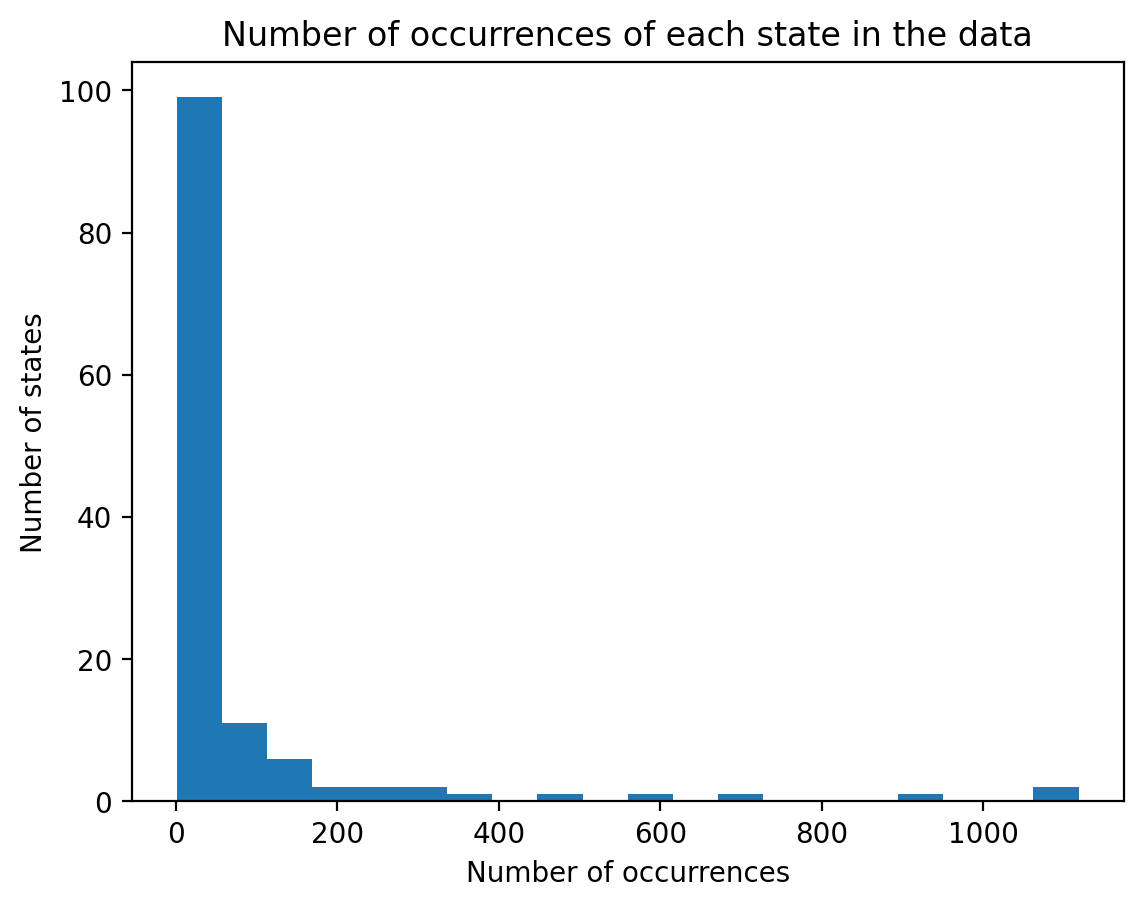

In [8]:
from matplotlib import pyplot as plt

plt.hist(counts, bins=20)
plt.xlabel("Number of occurrences")
plt.ylabel("Number of states")
plt.title("Number of occurrences of each state in the data")
plt.show()

# Models

I will look at a variety of different HMM music generation models.

In [9]:
num_hidden_states = 20  # Number of hidden states to use in every model

In [10]:
from musichmm import SongDataset

# Define a simpler dataset that only contains the first part of each song
simple_data = SongDataset([song.part(0) for song in data])  

## SimpleMusicHMM

The SimpleMusicHMM model only trains on songs with a single part, and therefore a single sequence of NoteState objects.

In [11]:
# Take a look at an example state sequence
print(simple_data[0].to_states()[0])

[NoteState(C4, 0.5), NoteState(D4, 0.5), NoteState(E4, 1.0), NoteState(F4, 1.0), NoteState(G4, 1.0), NoteState(F4, 1.0), NoteState(E4, 1.0), NoteState(D4, 1.0), NoteState(E4, 1.0), NoteState(E4, 1.0), NoteState(E4, 1.0), NoteState(D4, 0.5), NoteState(E4, 0.5), NoteState(F4, 0.5), NoteState(E4, 0.5), NoteState(D4, 1.0), NoteState(C4, 1.0), NoteState(D4, 1.0), NoteState(C4, 1.0), NoteState(C4, 1.0), NoteState(D4, 1.0), NoteState(E4, 1.0), NoteState(F4, 1.0), NoteState(E4, 1.0), NoteState(D4, 1.0), NoteState(E4, 1.0), NoteState(D4, 1.0), NoteState(D4, 1.0), NoteState(E4, 1.0), NoteState(F4, 1.0), NoteState(G4, 1.0), NoteState(F4, 1.0), NoteState(E4, 1.0), NoteState(D4, 1.0), NoteState(E4, 1.0), NoteState(E4, 1.0), NoteState(E4, 1.0), NoteState(D4, 0.5), NoteState(E4, 0.5), NoteState(F4, 0.5), NoteState(E4, 0.5), NoteState(D4, 1.0), NoteState(C4, 0.5), NoteState(A3, 0.5), NoteState(B3, 1.0), NoteState(C4, 1.0)]


In [12]:
from musichmm import SimpleMusicHMM

simple_hmm = SimpleMusicHMM(num_hidden_states)

In [13]:
simple_hmm.initialize_states(simple_data)[0].flatten()[:100]    # First 100 states encoded as state indices

array([28, 39, 48, 56, 67, 56, 48, 41, 48, 48, 48, 39, 46, 54, 46, 41, 30,
       41, 30, 30, 41, 48, 56, 48, 41, 48, 41, 41, 48, 56, 67, 56, 48, 41,
       48, 48, 48, 39, 46, 54, 46, 41, 28, 11, 23, 30, 30, 30, 41, 49, 61,
       67, 69, 62, 69, 48, 58, 48, 43, 30, 44, 33, 41, 41, 48, 58, 56, 49,
       39, 48, 44, 48, 48, 48, 57, 65, 77, 79, 72, 79, 89, 97, 50, 58, 48,
       41, 41, 67, 78, 65, 56, 46, 39, 42, 28, 33, 28, 39, 48, 56])

In [14]:
simple_hmm.fit(simple_data)

In [15]:
# Example of sampling from the model
simple_hmm.sample(num_notes=10).flatten()       # This is not the note sequence in the generated song

array([ 67, 127,  41,  30,  41,  43,  30,  48,  43,  48])

In [16]:
simple_generated_song = simple_hmm.generate_song(num_notes=100)

In [17]:
simple_generated_song.save('songs/simple_generated.mid')

# SimpleIndependentMusicHMM

The SimpleIndependentMusicHMM model only trains on songs with a single part; however, it separates the pitch and duration states into two separate HMMs.
While this makes the assumption that pitch and duration are independent, it takes advantage of the smaller state space for each, making the problem easier.
This is a fairly trivial extension, since the the number of states is the same for each HMM.

In [18]:
from musichmm import SimpleIndependentMusicHMM

simple_indep_hmm = SimpleIndependentMusicHMM(num_hidden_states)

In [19]:
# Example of state sequence input to the model
simple_indep_hmm.initialize_states(simple_data)[0]

array([[ 9,  2],
       [11,  2],
       [13,  4],
       ...,
       [18,  2],
       [11,  6],
       [ 9,  4]])

In [20]:
simple_indep_hmm.fit(simple_data)

In [21]:
simple_indep_hmm.sample(num_notes=10)

array([[10,  4],
       [10,  4],
       [10,  2],
       [19,  2],
       [23,  4],
       [13,  6],
       [18,  6],
       [ 9,  4],
       [18,  2],
       [13,  2]])

In [22]:
simple_indep_generated_song = simple_indep_hmm.generate_song(num_notes=100)

In [23]:
simple_indep_generated_song.save("songs/simple_indep_generated.mid")

#### TODOs:
- Implement the NaiveMusicHMM model with the CategoricalHMM for all parts
    * Should I do this with the pitch/duration independence or not?
- Implement the dependent model (worth it?)

#### IDEAS:
- Get the probability of generated note sequences
- Use the MultinomialHMM with 2 dimensions and let one dimension be pitches and the other be durations


#### Presentation
- Talk about tokenization problems
- Walk through the progression from Simple to more complex HMMs
- Share results (generated music, probabilities, etc.) for each model